# ML Prerequisite Test - Fall 2024 #
### Author: Aarsh Wankar ###
### Roll number: 23110003 ###
### Date last edited: 6th August 2024 ###

Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

A1. When muliplying two matrices of dimensions (n, k) and (k,m), we need to calculate the dot product of every row in the first matrix with every column of the second matrix. Number of dot products needed is, therefore, $n*m$. Every dot product takes k multiplications. Therefore, the total number of multiplications required is: $$n*m*k$$ Additionally, we need to add the k numbers to each other, which takes k-1 additions per vector pair. Therefore, the number of additions required is: $$n*m*(k-1)$$

Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
import numpy as np
import time
def mymatmul(a, b):
    (n, k1) = (len(a), len(a[0]))
    (k2, m) = (len(b), len(b[0]))
    if k1 != k2:
        print(f"Passed matrices are of dimensions {(n, k1)} and {(k2, m)}. Invalid dimensions.")
        return
    k = k1
    ans = [[0 for i in range(m)] for j in range(n)]      
    for i in range(n):
        for j in range(m):
            summ = 0
            for q in range(k):
                summ += a[i][q]*b[q][j]
            ans[i][j] = summ
    return ans



In [2]:
a= [[i*j for i in range(500)] for j in range(300)]
b = [[i*j for i in range(200)] for j in range(500)]
a_np = np.array(a)
b_np = np.array(b)
t1_start = time.time()
c = mymatmul(a, b)
t1_end = time.time()
t2_start = time.time()
d = np.matmul(a_np, b_np)
t2_end = time.time()
print(f"Time taken by mymatmul: {t1_end-t1_start} seconds.")
print(f"Time taken by np.matmul: {t2_end-t2_start} seconds.")

Time taken by mymatmul: 5.646924018859863 seconds.
Time taken by np.matmul: 0.0652165412902832 seconds.


A2. It can therefore be seen that mymatmul takes significantly greater time than the inbuilt np.matmul function. This is because np.matmul utilizes parallel processing for matrix multiplication, and is highly optimized.

Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

A3. The method mentioned above is similar to bubblesort. With one pass of the array, we have the largest element at the end. Then, with the second pass, the second biggest element is taken to the second last element of the array. Similarly, we need to find the $\frac{n}{2}th$ largest element of the array. This will take $\frac{n}{2}$ passes of the array, leading to a time complexity of $O(n^2)$. A better method would be using the k-select algorithm, which finds the $k$ th element of the array when sorted. This algorithm runs in $O(n)$ time on an average, though in the worst case, the time taken is $O(n^2)$.

1. Implementation of the bubblesort routine:

In [3]:
import math
import numpy as np
import time
def median(arr):
    n = len(arr)
    for i in range(n//2+1):
        for j in range(n-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    if n%2 == 0:
        return (arr[n//2 -1]+arr[n//2])/2
    return arr[n//2]




In [4]:
np.random.seed(10)
arr = np.array([np.random.randint(1, 10000) for _ in range(5000)])
#arr = np.arange(1, 5000)
t1 = time.time()
print(median(arr))
t2 = time.time()
print(np.median(arr))
t3 = time.time()
print(f"Time taken by the bubblesort implementation: {t2-t1} seconds.")
print(f"Time taken by numpy.median function: {t3-t2} seconds.")

4869.5
4869.5
Time taken by the bubblesort implementation: 9.97272777557373 seconds.
Time taken by numpy.median function: 0.0011513233184814453 seconds.


2. Implementation of recursive k-select algorithm:

In [5]:
def k_select(arr, k):
    n = len(arr)
    pivot = np.random.randint(0, n)
    larr = []
    rarr = []
    for i in range(pivot):
        if arr[i] <= arr[pivot]:
            larr.append(arr[i])
        else:
            rarr.append(arr[i])
    for i in range(pivot+1, n):
        if arr[i] < arr[pivot]:
            larr.append(arr[i])
        else:
            rarr.append(arr[i])
    if len(larr) == k-1:
        return arr[pivot]
    elif len(larr) >= k:
        return k_select(larr, k)
    else:
        return k_select(rarr, k-len(larr)-1)


def newmedian(arr):
    n = len(arr)
    if n%2 == 0:
        return ((k_select(arr, n/2)+k_select(arr, n/2+1))/2)
    else:
        return (k_select(arr, n//2+1))


In [6]:
arr = [1, 2, 3, 4, 5, 6]
print(newmedian(arr))

3.5


In [7]:
np.random.seed(11)
arr = np.array([np.random.randint(1, 10000) for _ in range(7000)])
#arr = np.arange(1, 5000)
t1 = time.time()
print(f'Median according to bubblesort median: {median(arr)}')
t2 = time.time()
print(f'Median according to k_select median: {newmedian(arr)}')
t3 = time.time()
print(f'Median according to np.median: {np.median(arr)}')
t4 = time.time()
print("------------------------------")
print(f"Time taken by the bubblesort implementation: {t2-t1} seconds.")
print(f"Time taken by k_select median function: {t3-t2} seconds.")
print(f"Time taken by np.median function: {t4-t3} seconds.")

Median according to bubblesort median: 4974.5
Median according to k_select median: 4974.5
Median according to np.median: 4974.5
------------------------------
Time taken by the bubblesort implementation: 25.49642062187195 seconds.
Time taken by k_select median function: 0.01446223258972168 seconds.
Time taken by np.median function: 0.0010104179382324219 seconds.


Thus, it can be seen that np.median is a highly optimized one (obviously), and is faster than both bubblesort and k_select algorithms.

Q4. What is the gradient of the following function with respect to x and y?
$$x^2y+y^3sin(x)$$

A4. The given function is: $$f(x, y) = x^2y+y^3sin(x)$$The gradient of this function w.r.t x is:
$$\frac{\partial f}{\partial x} = 2xy+y^3cos(x)$$
The gradient of this function w.r.t y is:
$$\frac{\partial f}{\partial y} = x^2+3y^2sin(x)$$

Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [8]:
import numpy as np
import jax.numpy as jnp
from jax import grad
def f(x):
    return (x[0]**2)*x[1]+(x[1]**3)*jnp.sin(x[0])

def del_f(x):
    x = np.array(x)
    del_x = 2*x[0]*x[1]+x[1]**3*jnp.cos(x[0])
    del_y = x[0]**2+3*x[1]**2*jnp.sin(x[0])
    ans = np.zeros_like(x)
    ans[0] = del_x; ans[1] = del_y
    return jnp.array(ans)
f_dash = grad(f)



In [9]:
#Case 1: x = 3, y=4
print("Case 1: x = 3, y=4")
print(f"Output by JAX: {np.array(f_dash([3.0, 4.0]))}")
print(f"Output by del_f: {del_f([3.0, 4.0])}")
print("===================")
#Case 2: x = 0.01, y=90, z = 99 (z is dummy, f does not depend on z)
print("Case 2: x = 0.01, y=90, z = 99")
print(f"Output by JAX: {np.array(f_dash([0.01, 90.0, 99.0]))}")
print(f"Output by del_f: {del_f([0.01, 90.0, 99.0])}")
print("===================")


Case 1: x = 3, y=4
Output by JAX: [-39.35952  15.77376]
Output by del_f: [-39.35952  15.77376]
Case 2: x = 0.01, y=90, z = 99
Output by JAX: [7.2896538e+05 2.4299605e+02 0.0000000e+00]
Output by del_f: [7.2896538e+05 2.4299605e+02 0.0000000e+00]


A5. Thus, it can be seen that the outputs of both, the analytically defined gradient function, and the one automatically found by JAX match. Adding a dummy variable z in both functions results in a zero grad in the index corrresponding to the dummy variable, as can be seen in case 2.

Q6. Use sympy to confirm that you obtain the same gradient analytically.

In [10]:
import sympy as sp
x, y = sp.symbols('x y')
sp.init_printing()
f = (x**2)*y+(y**3)*(sp.sin(x))

In [11]:
print(f"Before Differentiation :")
display(f)
print("After Differentiation with x: ")
display(sp.diff(f, x))
print("After Differentiation with y: ")
display(sp.diff(f, y))

Before Differentiation :


After Differentiation with x: 


After Differentiation with y: 


A6. It can thus be seen that the partial derivatives calculated by hand match those found by the sympy library.

Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [12]:
dic = {2022:{}, 2023:{}, 2024:{}, 2025:{}}
for year in dic.keys():
    dic[year] = {"Branch 1": {}, "Branch 2": {}}
    for branch in dic[year].keys():
        for i in range(1, 11):
            dic[year][branch][i] = {"Rollno":i, "Name":None, "Marks":{"Maths": None, "Science": None, "English": None}}
        


In [13]:
dic[2022]["Branch 1"][5]["Name"] = "Ravi"
dic[2022]["Branch 1"][5]["Marks"] = {"Maths": 100, "Science": 99, "English": 98}

In [14]:
print(dic[2022]["Branch 1"][5])

{'Rollno': 5, 'Name': 'Ravi', 'Marks': {'Maths': 100, 'Science': 99, 'English': 98}}


Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [15]:
class Student:
    def __init__(self, roll, name, math=None, science=None, english=None):
        self.name= name
        self.roll = roll
        self.math = math
        self.science = science
        self.english  = english
    def show_details(self):
        print("=============")
        print(f"Name: {self.name}")
        print(f"Roll: {self.roll}")
        print(f"Math score: {self.math}")
        print(f"Science score: {self.science}")
        print(f"English score: {self.english}")
        print("=============")

class Branch:
    def __init__(self, branch, student_list=None):
        self.branch = branch
        self.student_list = student_list
class Year:
    def __init__(self, year, branch_list=None):
        self.year = year
        self.branch_list = branch_list
class Database:
    def __init__(self, years=None):
        self.years = years

In [16]:
import numpy as np
db = Database([Year(2020), Year(2021), Year(2022), Year(2023), Year(2024), Year(2025)])
for i in range(len(db.years)):
    db.years[i].branch_list = [Branch(1), Branch(2)]
    for branch in db.years[i].branch_list:
        branch.student_list = [Student(roll=j, name=f"Test name {j}", math = np.random.randint(95, 101), english=np.random.randint(95, 101), science = np.random.randint(95, 101)) for j in range(1, 11)]

In [17]:
db.years[1].branch_list[1].student_list[5].show_details()

Name: Test name 6
Roll: 6
Math score: 100
Science score: 99
English score: 100


Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
1. $$y=x$$
2. $$y=x^2$$
3. $$y=\frac{x^3}{3}$$
4. $$y=sin(x)$$
5. $$y=\frac{sin(x)}{x}$$
6. $$y=log(x)$$
7. $$y=e^x$$

In [18]:
import matplotlib.pyplot as plt
x = np.arange(0.5, 100.5, 0.5)

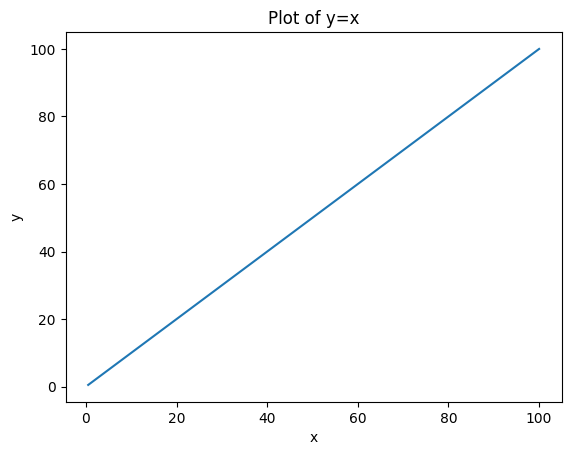

In [19]:
#1. y=x
y = x
plt.plot(x, y)
plt.title("Plot of y=x")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

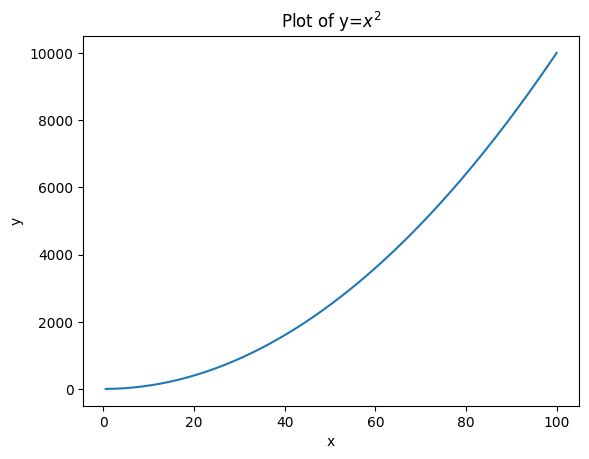

In [20]:
#2. y=x^2
y = x**2
plt.plot(x, y)
plt.title("Plot of y=$x^2$")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

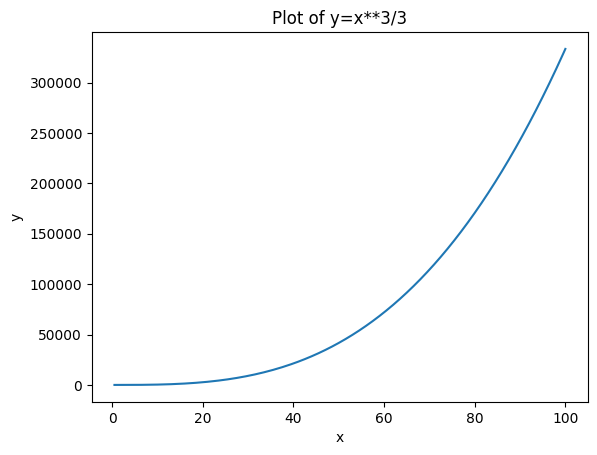

In [21]:
#3. y=x^3/3
y = x**3/3
plt.plot(x, y)
plt.title("Plot of y=x**3/3")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

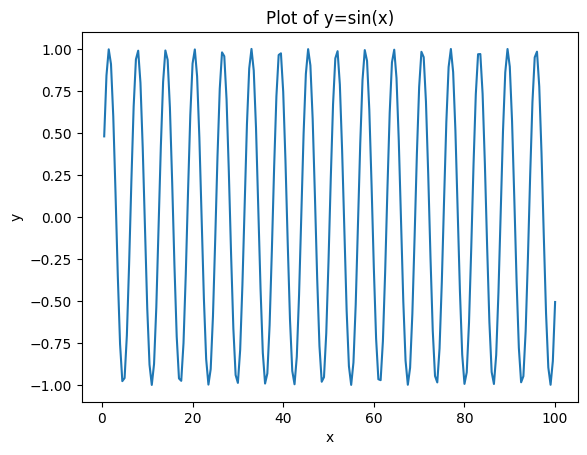

In [22]:
#4. y=sin(x)
y = np.sin(x)
plt.plot(x, y)
plt.title("Plot of y=sin(x)")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

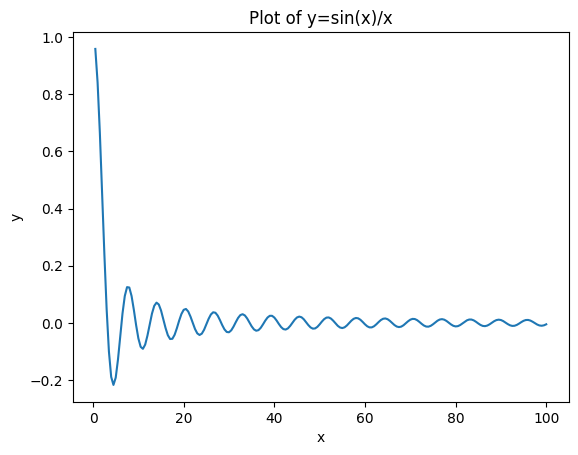

In [23]:
#5. y=sin(x)/x
y = (np.sin(x))/x
plt.plot(x, y)
plt.title("Plot of y=sin(x)/x")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

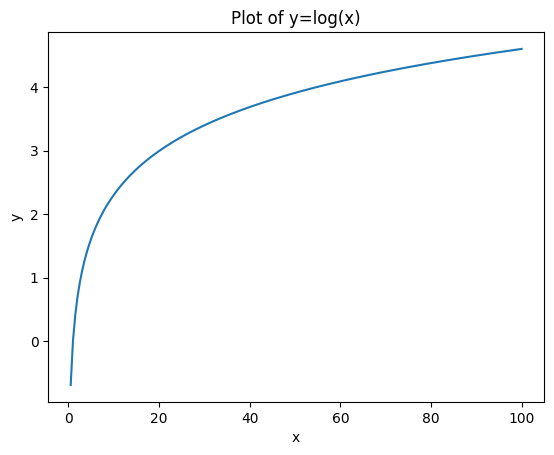

In [24]:
#6. y = log(x)
y = np.log(x)
plt.plot(x, y)
plt.title("Plot of y=log(x)")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

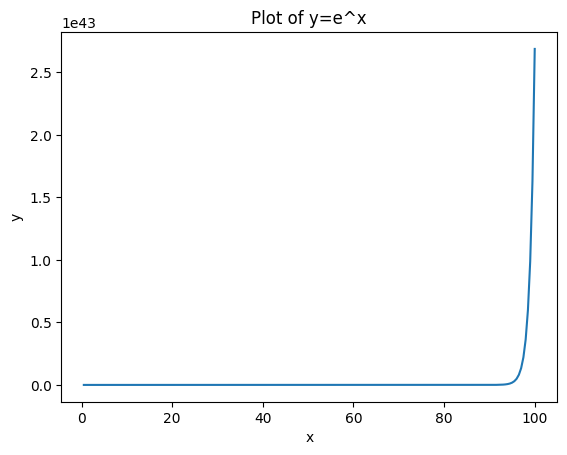

In [25]:
#7. y = e^x
y = np.exp(x)
plt.plot(x, y)
plt.title("Plot of y=e^x")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [26]:
import pandas as pd
np.random.seed(100)
mat = np.random.uniform(1, 2, (20, 5))
df = pd.DataFrame(mat)
df.rename(columns={0: 'a', 1: 'b', 2: 'c', 3: 'd', 4:'e'},inplace=True)
cols = df.columns
print(df.columns)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [27]:
arr = [np.std(np.array(df[cols[i]])) for i in range(len(cols))]
print(f"The column with maximum std is: {cols[np.argmax(arr)]}, with a std of: {np.max(arr)}")

The column with maximum std is: d, with a std of: 0.32545325509992007


In [28]:
mean_arr = np.array(df.mean(axis=1))
print(f"The row with the minimum mean is {np.argmin(mean_arr)}, with a mean of {min(mean_arr)}")

The row with the minimum mean is 11, with a mean of 1.2612518251194131


Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [29]:
df['f'] = df['a']+df['b']+df['c']+df['d']+df['e']

In [30]:
def comp8(n):
    if n<8:
        return "LT8"
    else:
        return "GT8"

df['g'] = df['f'].apply(comp8)
display(df)

,a,b,c,d,e,f,g
0,1.543405,1.278369,1.424518,1.844776,1.004719,7.095787,LT8
1,1.121569,1.670749,1.825853,1.136707,1.575093,7.329971,LT8
2,1.891322,1.209202,1.185328,1.108377,1.219697,6.613927,LT8
3,1.978624,1.811683,1.171941,1.816225,1.274074,8.052546,GT8
4,1.431704,1.940030,1.817649,1.336112,1.175410,7.700906,LT8
5,1.372832,1.005689,1.252426,1.795663,1.015255,6.441864,LT8
6,1.598843,1.603805,1.105148,1.381943,1.036476,6.726215,LT8
7,1.890412,1.980921,1.059942,1.890546,1.576901,8.398722,GT8
8,1.742480,1.630184,1.581842,1.020439,1.210027,7.184972,LT8
9,1.544685,1.769115,1.250695,1.285896,1.852395,7.702786,LT8


Q12. Write a small piece of code to explain broadcasting in numpy.

A12. Broadcasting is a method by which two dissimilar arrays can be added to each other. For example, consider a 1d array [1, 2, 3, 4], and a 2d array [[4], [5], [6], [7]]. Here, whe we add these numpy arrays, they first get converted to 2d matrices: [[1, 2 , 3, 4], [1, 2 , 3, 4], [1, 2 , 3, 4], [1, 2 , 3, 4]], and [[4, 4, 4, 4], [5, 5, 5, 5], [6, 6, 6, 6], [7, 7, 7, 7]]. Thus, when they get added, we get the matrix: [[5, 6, 7, 8], [6, 7, 8, 9], [7, 8, 9, 10], [8, 9, 10, 11]]. This can be confirmed in the small piece of code shown below:

In [31]:
a = np.array([1, 2, 3, 4])
b = np.array([[4], [5], [6], [7]])
print(a+b)

[[ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]]


Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [32]:
def myargmin(arr):
    flarr = arr.flatten()
    min = flarr[0]
    argmin = 0
    for i in range(len(flarr)):
        if flarr[i] < min:
            argmin = i
            min = flarr[i]
    return argmin

In [33]:
arr = df.to_numpy()[:,:-1]
print(myargmin(arr))
print(np.argmin(arr))

4
4
